In [84]:
# import packages
# matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pathlib import Path
import time
import os


In [85]:
testdataFilename = './data/2018-01-01__2019-01-01__NConservatory_npWeekdayAllOrderedSensorsTimeRef.npy'


In [86]:
npTrainMatrix = np.load(testdataFilename, allow_pickle=True)

In [87]:
npTestDayOld = npTrainMatrix[0,:]

In [88]:
npTestDayOld.shape

(2112,)

In [89]:
autoencoder = load_model('./autoencoder_north_plants.h5')

In [ ]:
autoencoder = load_model('./autoencoder_south_plants.h5')

In [90]:
testDataReshaped = npTestDayOld.reshape(22,96).transpose()

In [91]:
testDataReshaped.shape

(96, 22)

In [92]:
df_test=pd.DataFrame(testDataReshaped, columns=['co2_1', 'co2_2', 'co2_3', 'co2_4', 'dew_1', 'dew_2', 'dew_3', 'dew_4',
       'relH_1', 'relH_2', 'relH_3', 'relH_4', 'temp_1', 'temp_2', 'temp_3',
       'temp_4', 'externTemp_1', 'externHumid_1', 'externCondition_1', 'externSunrise_1', 'hour_index', 'day_index'])

In [93]:
df_test.shape


(96, 22)

In [94]:
del df_test['externSunrise_1']

In [95]:
testdata_predictions = autoencoder.predict(df_test)

In [96]:
mse = np.mean(np.power(df_test - testdata_predictions, 2), axis=1)

In [102]:
np.argwhere(mse>=(mse.mean()+2*mse.std()))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


array([[5],
       [6]])

In [103]:
df_test['anomaly'] = pd.Series((mse>(mse.mean()+2*mse.std())).astype(int), index=df_test.index)

In [104]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [9.5, 13]
plt.rcParams['figure.subplot.left'] = plt.rcParams['figure.subplot.bottom'] = .1
plt.rcParams['figure.subplot.right'] = plt.rcParams['figure.subplot.top'] = .9

<IPython.core.display.Javascript object>


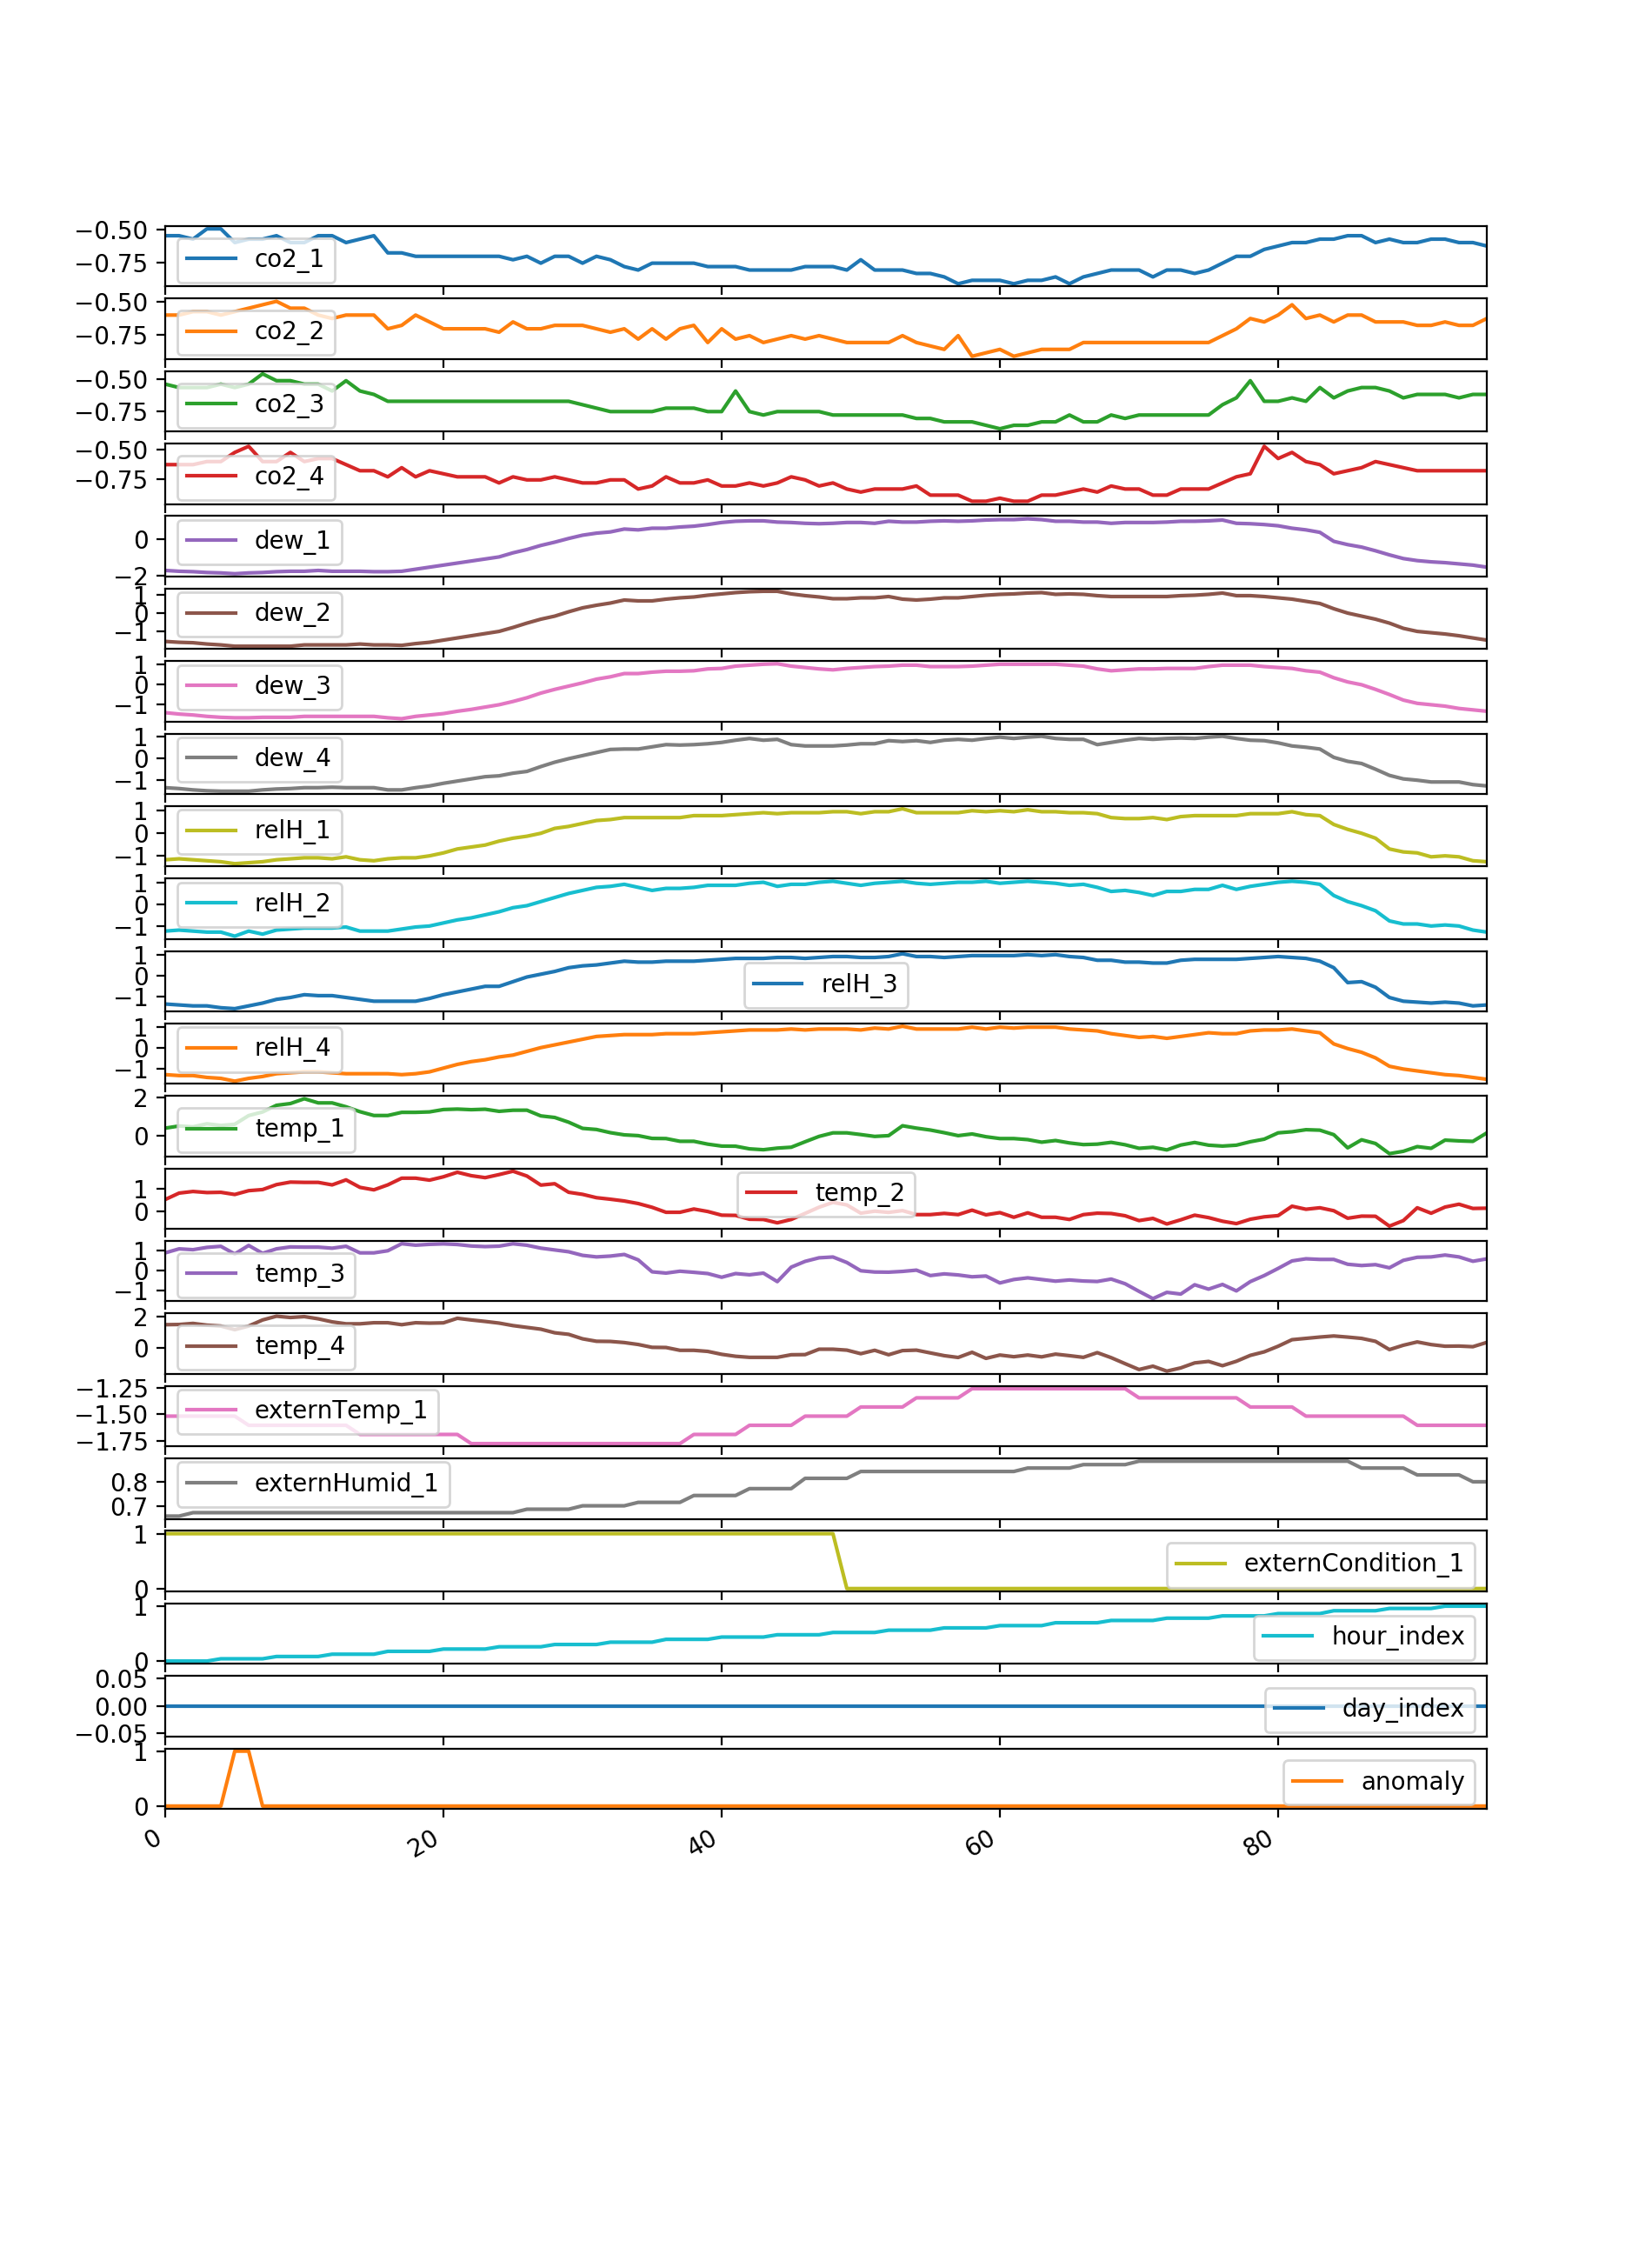

In [105]:
df_test.plot(subplots=True);

In [39]:
!wget https://making.do/geva_anomalies.pickle.npy

--2019-07-12 21:50:48--  https://making.do/geva_anomalies.pickle.npy
Resolving making.do (making.do)... 208.113.184.135
Connecting to making.do (making.do)|208.113.184.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25161 (25K)
Saving to: ‘geva_anomalies.pickle.npy’

geva_anomalies.pick 100%[===================>]  24.57K  --.-KB/s    in 0.001s  

2019-07-12 21:50:48 (19.0 MB/s) - ‘geva_anomalies.pickle.npy’ saved [25161/25161]



In [40]:
geva_anomalies = np.load('geva_anomalies.pickle.npy')

In [41]:
geva_anomalies

array([False, False, False, ..., False, False, False])

In [42]:
geva_anomalies.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
np.argwhere(geva_anomalies==1)

array([[  201],
       [  202],
       [  323],
       [  601],
       [  687],
       [  690],
       [  691],
       [  700],
       [  718],
       [  719],
       [  847],
       [  848],
       [  849],
       [  879],
       [  889],
       [  890],
       [  912],
       [  926],
       [  927],
       [  945],
       [  985],
       [  986],
       [ 1098],
       [ 1110],
       [ 1296],
       [ 1468],
       [ 1589],
       [ 1617],
       [ 1618],
       [ 1859],
       [ 1953],
       [ 1954],
       [ 1956],
       [ 1957],
       [ 1964],
       [ 2050],
       [ 2234],
       [ 2351],
       [ 2355],
       [ 2455],
       [ 2480],
       [ 2482],
       [ 2483],
       [ 2484],
       [ 2486],
       [ 2487],
       [ 2523],
       [ 2920],
       [ 2921],
       [ 2928],
       [ 3222],
       [ 3475],
       [ 3604],
       [ 3607],
       [ 3763],
       [ 4464],
       [ 4736],
       [ 4786],
       [ 4936],
       [ 5039],
       [ 5040],
       [ 5239],
       [

In [46]:
whole_year_df['anomaly_geva'] = pd.Series((geva_anomalies.astype(int)), index=whole_year_df.index)

<IPython.core.display.Javascript object>


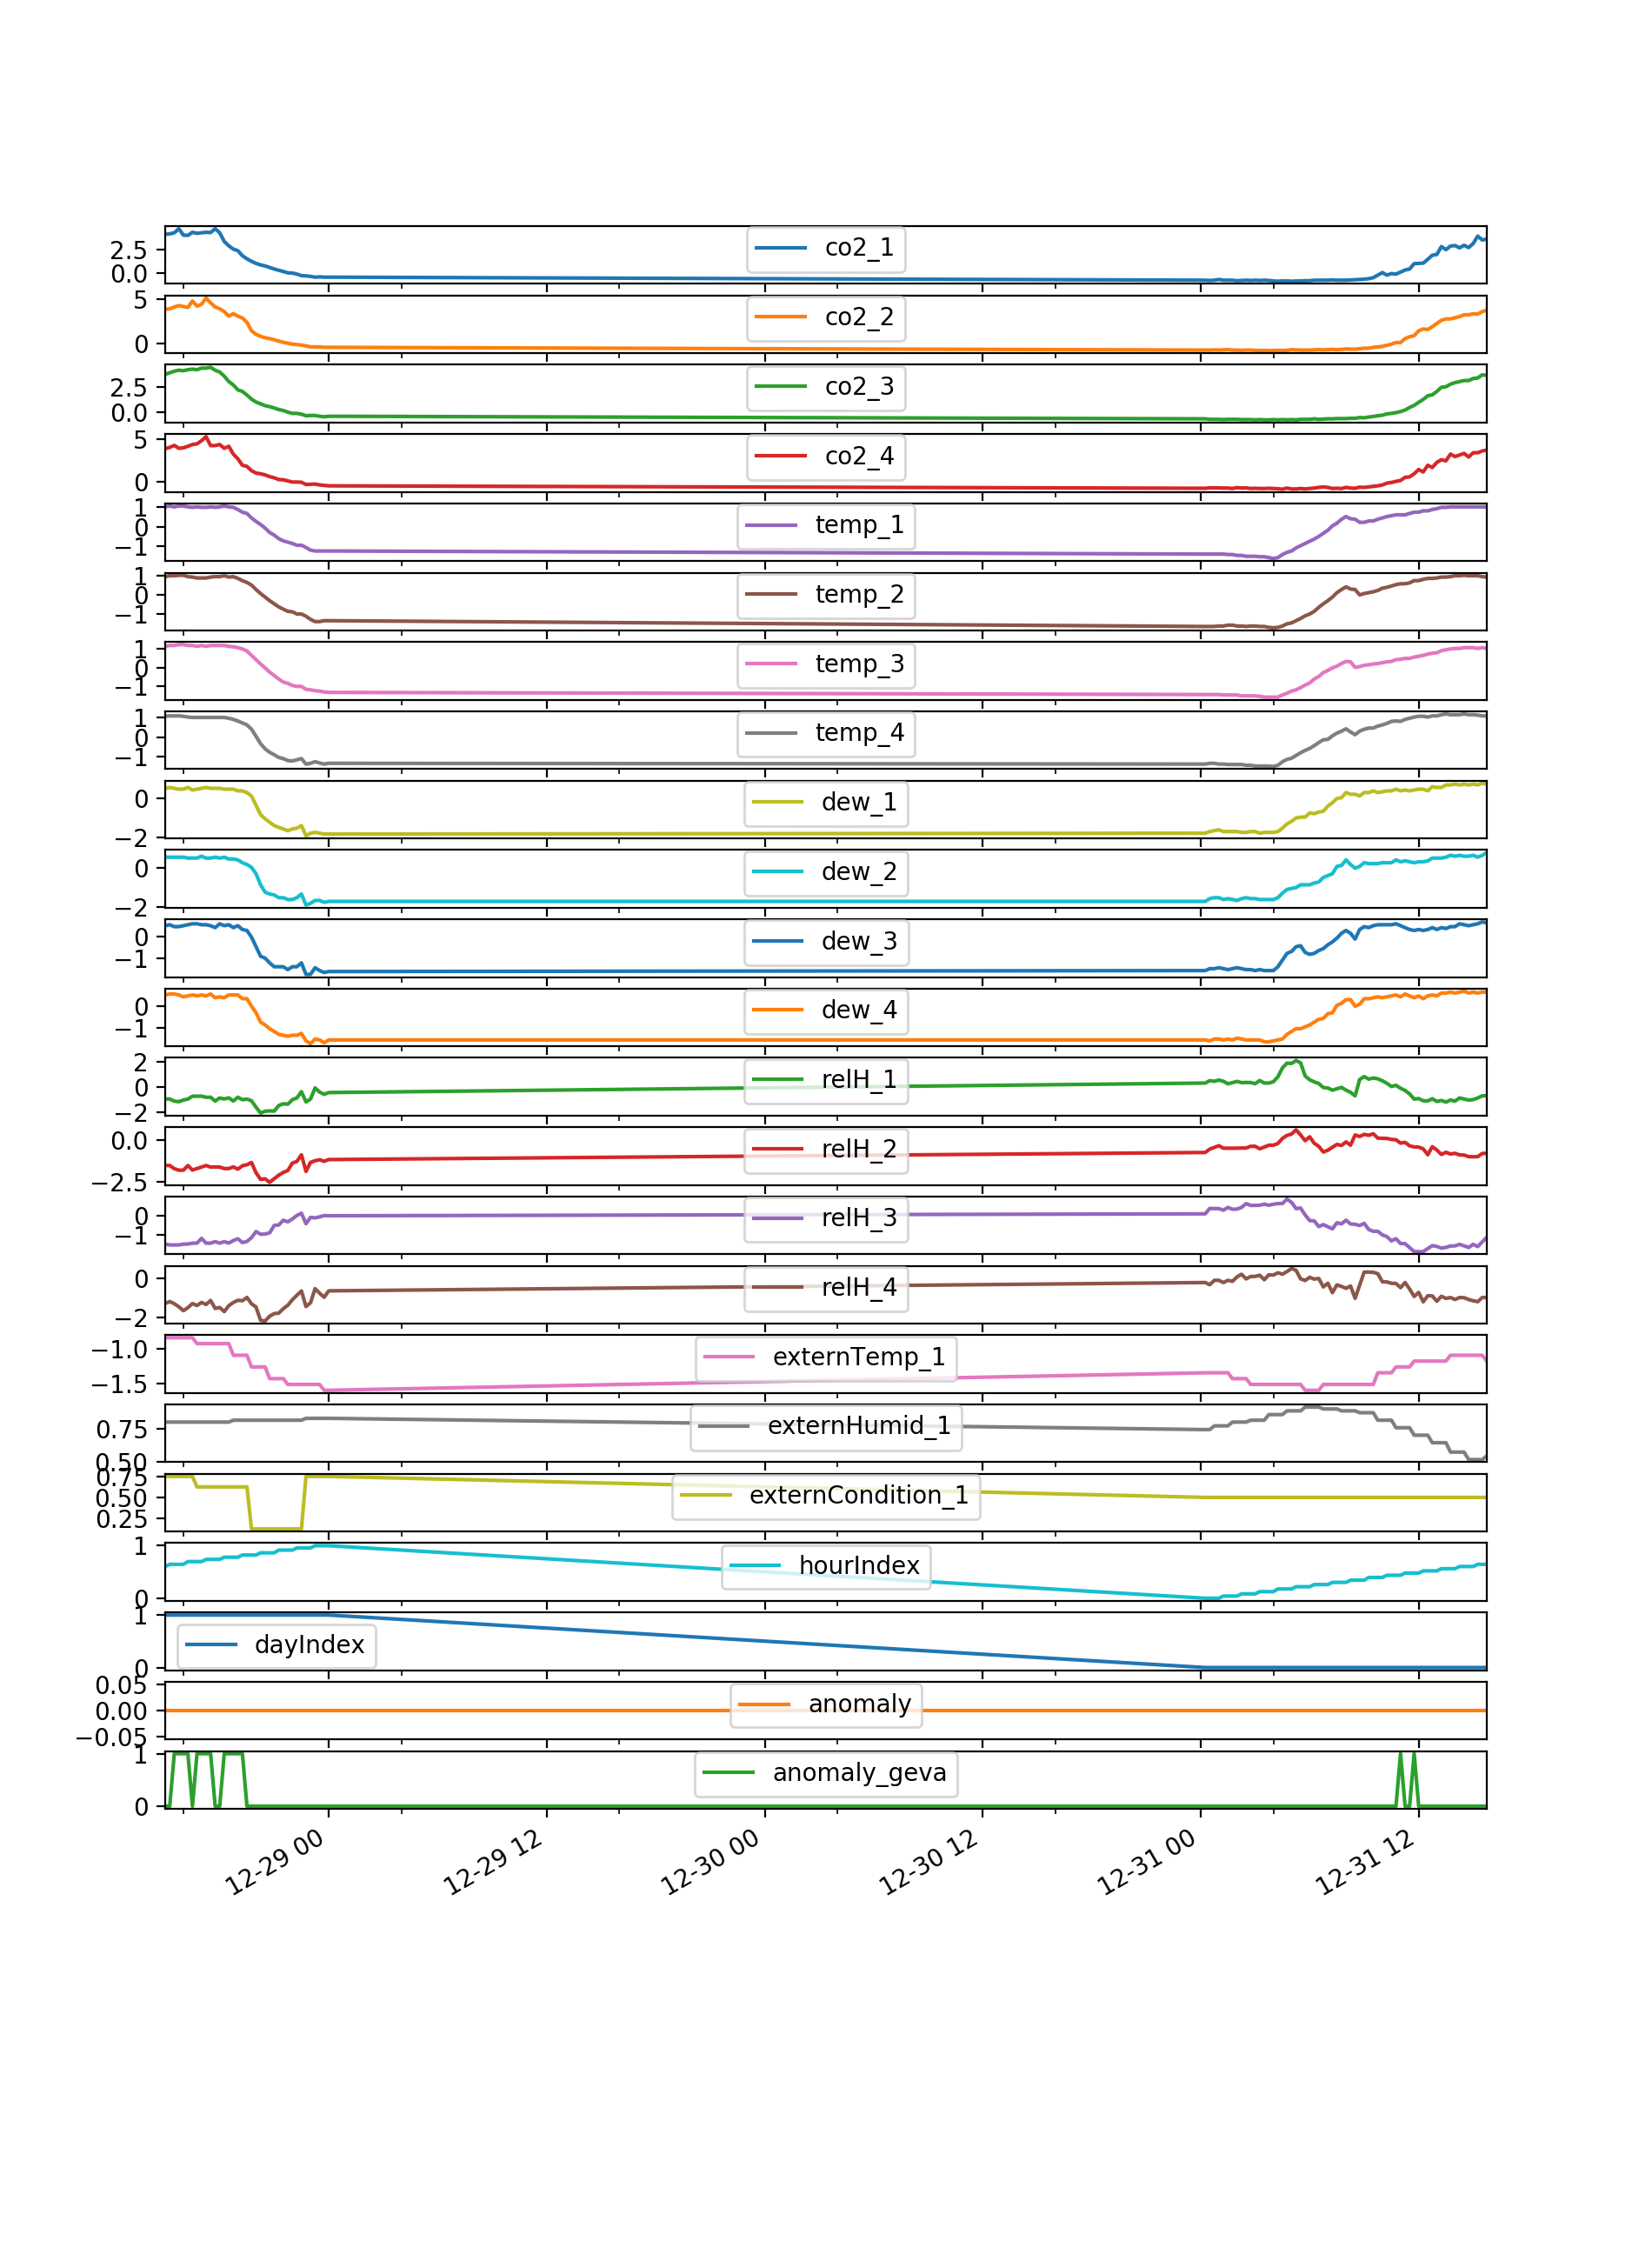

In [67]:
whole_year_df[24900:25000].plot(subplots=True);

In [54]:
!wget https://making.do/geva_error_vector.npy

--2019-07-12 22:09:29--  https://making.do/geva_error_vector.npy
Resolving making.do (making.do)... 208.113.184.135
Connecting to making.do (making.do)|208.113.184.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200384 (196K)
Saving to: ‘geva_error_vector.npy’

geva_error_vector.n 100%[===================>] 195.69K  --.-KB/s    in 0.009s  

2019-07-12 22:09:29 (20.2 MB/s) - ‘geva_error_vector.npy’ saved [200384/200384]



In [56]:
!ls -l *h5

-rw-rw-r-- 1 ec2-user ec2-user 41032 Jul 12 21:10 autoencoder_plants.h5


In [57]:
geva_anomalies = np.load('geva_error_vector.npy')

In [61]:
np.argwhere(geva_anomalies>=(geva_anomalies.mean()+10*geva_anomalies.std()))

array([[  718],
       [  719],
       [ 1589],
       [19998],
       [23384],
       [23669],
       [24753],
       [24908]])